# Support Vector Machines

- LinearSVC

- SVC

- SGDClassifier (For Online training of models)

- Polynomial Kernel

- RBF Kernel

- Support Vector Regression

In [1]:
# Loading the iris data for classification modeling

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]
y = iris["target"]

X.shape, y.shape

((150, 2), (150,))

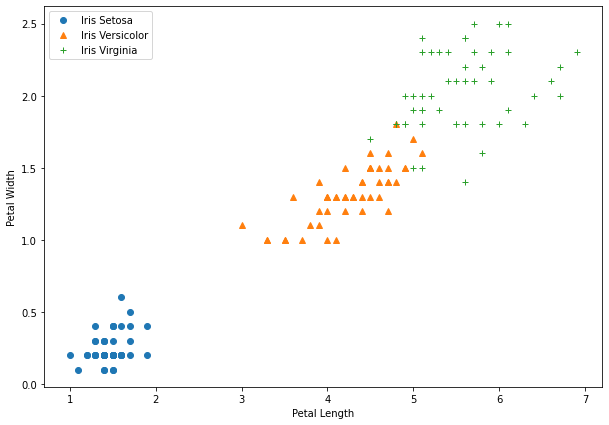

In [8]:
# Let's plot our data to see if we need a linear or non-linear model

# setosa = (y == 0).astype(int)
# versicolor = (y == 1).astype(int)
# virginia = (y == 2).astype(int)

setosa = (y == 0)
versicolor = (y == 1)
virginia = (y == 2)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(X[y == 0, 0], X[y == 0, 1], 'o', label = "Iris Setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], '^', label = "Iris Versicolor")
plt.plot(X[y == 2, 0], X[y == 2, 1], '+', label = "Iris Virginia")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
ax.legend(loc = "upper left")

## Linear Support Vector Classifier

- It is used for linearly seperable data.

- **loss = "hinge"** must be specified as it is not as default.

- **C** is an inverse regularization hyperparameter, it determines the models ability to allow mis-classifications. 

- A low value of **C** allows more missclassifications but is good for generalization of the model. (Underfit)

- A high value of **C** allows less missclassifications but may overfit the training data. (Overfit)

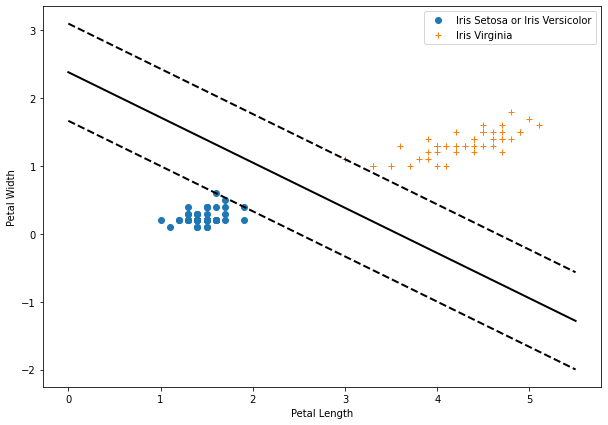

In [25]:
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


svm_clf = LinearSVC(C = 10, loss = "hinge")
svm_clf.fit(X, y)

w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary or hyperplane w0*x0 + w1*x1 + b = 0
# x1 = -w0/w1 * x0 - b/w1

# Let's create sample x0 (petal length) values

x0 = np.linspace(0, 5.5, 200)

a = w[0] / w[1]

x1 = -a * x0 - b / w[1]

# decision_boundary (Hyperplane) = (x0, x1)

margin = 1/w[1]
gutter_up = x1 + margin
gutter_down = x1 - margin


fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(X[y == 0, 0], X[y == 0, 1], 'o', label = "Iris Setosa or Iris Versicolor")
ax.plot(X[y == 1, 0], X[y == 1, 1], '+', label = "Iris Virginia")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
ax.legend(loc = "upper right")

ax.plot(x0, x1, "k-", linewidth=2)
ax.plot(x0, gutter_up, "k--", linewidth=2)
ax.plot(x0, gutter_down, "k--", linewidth=2)

### Linear SVM Classifier with polynomial features

Text(0, 0.5, 'x2')

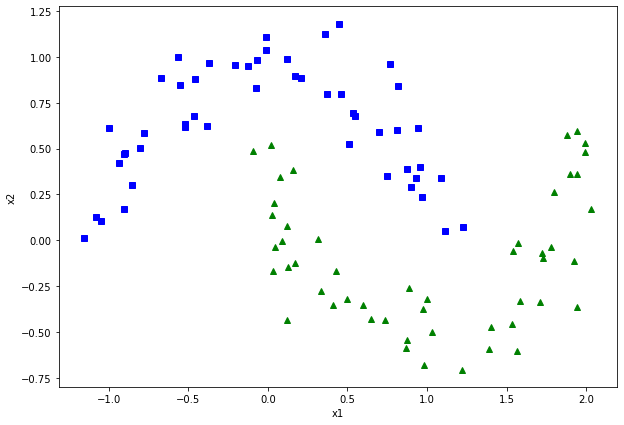

In [41]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import LinearSVC

X, y = make_moons(n_samples = 100, noise = 0.15)

class_1_index = (y == 1)
class_0_index = (y == 0)

plt.figure(figsize = (10, 7))
plt.plot(X[class_1_index][:, 0], X[class_1_index][:, 1], 'g^')
plt.plot(X[class_0_index][:, 0], X[class_0_index][:, 1], 'bs')
plt.xlabel("x1")
plt.ylabel("x2")

In [42]:
polynomial_svc = Pipeline([('poly', PolynomialFeatures(degree = 3)),
                           ('scaler', StandardScaler()),
                           ('LinearSVC', LinearSVC(C = 10, loss = 'hinge'))])
polynomial_svc.fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('LinearSVC',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [43]:
# Functions to plot hyperplane and data

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.figure(figsize = (10, 7))
    contour = plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.5)
    contour = plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)
    

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)


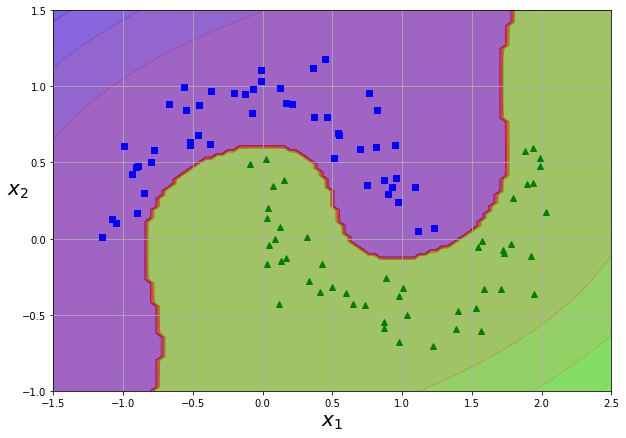

In [44]:
plot_predictions(polynomial_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Support Vector Classifier

### With Polynomial Kernel
- **coef0** is an hyperparameter which controls how much the model is influenced by higher degree polynomials, or       how much the model varies based on higher degree coefficients. (For model Regularization)


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

poly_svc = Pipeline([('scaler', StandardScaler()),
                     ('svc', SVC(kernel = 'poly', degree = 10, coef0 = 1, C = 5))])
poly_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

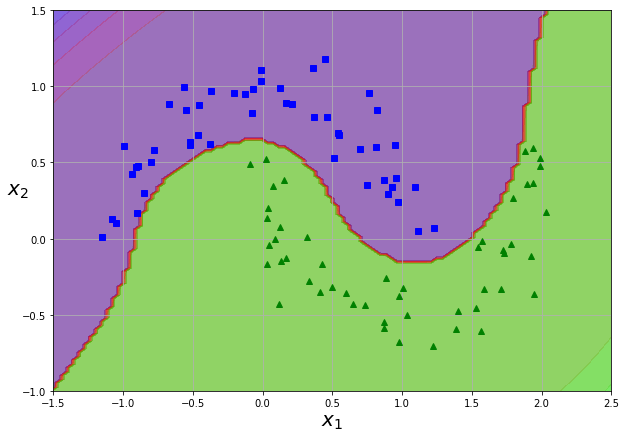

In [46]:
plot_predictions(poly_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [47]:
poly_svc[1].n_support_

array([5, 5], dtype=int32)

### With Gaussian RBF Kernel

- **gamma** acts like a regularization hyperparameter just like C

- The "rbf" kernel creates features in infinite dimensions making the data seperable.

- rbf is an exponential function, all exponential functions are an infinite series of numbers.

In [60]:
rbf_svc = Pipeline([('scaler', StandardScaler()),
                    ('svc', SVC(kernel = 'rbf', gamma = 5, C = 0.01))])
rbf_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.01, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

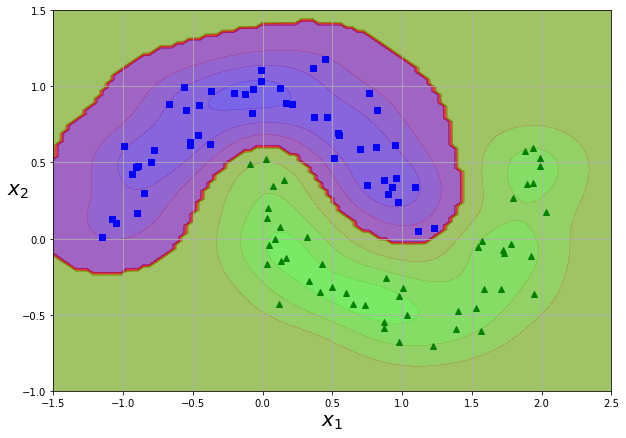

In [61]:
plot_predictions(rbf_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Support Vector Regression

- To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e., instances off the street)

- The width of the street is controlled by hyperparameter **epsilon**, adding more training instances within the margin does not affect the model's predictions, thus the model is said to be epsilon-insensitive.

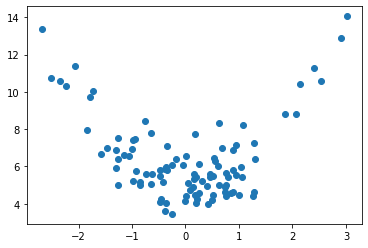

In [83]:
import numpy as np

X = np.random.randn(100, 1)
y = X**2 + 5 + np.random.randn(100, 1)

plt.plot(X.ravel(), y.ravel(), 'o')

In [84]:
from sklearn.svm import SVR

svr_clf = SVR(kernel = "poly", degree = 2, C = 1, epsilon = 2)
svr_clf.fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, cache_size=200, coef0=0.0, degree=2, epsilon=2, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

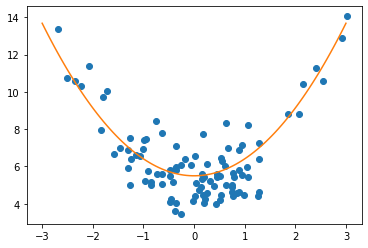

In [93]:
X_test = np.linspace(-3, 3, 100).reshape(X.shape)
y_predict = svr_clf.predict(X_test)

plt.plot(X.ravel(), y.ravel(), 'o')
plt.plot(X_test.ravel(), y_predict.ravel())